In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.lines import Line2D
import scipy.linalg as la
import seaborn as sns

**Objective** : To sample from $\mathcal{N}(\mu,\Sigma)$ where $\mu=
\begin{bmatrix}
    4\\ 
    4    
\end{bmatrix}$ and $\Sigma=\begin{bmatrix}
    1&0.8\\ 
    0.8&1    
\end{bmatrix}$ as given in the lecture

## **Sampling using Gibbs Sampler**

For bivariate gaussians the conditional distribution is also gaussian : \\
 $ p(x_{1}|x_{2})=\mathcal{N}(\mu_{0}+\frac{\Sigma_{12}}{\Sigma_{22}}(x_{2}-\mu_{2}),\Sigma_{11}-\frac{\Sigma_{12}^{2}}{\Sigma_{22}})$
 
 $ p(x_{2}|x_{1})=\mathcal{N}(\mu_{1}+\frac{\Sigma_{12}}{\Sigma_{11}}(x_{1}-\mu_{1}),\Sigma_{22}-\frac{\Sigma_{12}^{2}}{\Sigma_{11}})$

$\implies p(x_{1}|x_{2})=\mathcal{N}(0.8x_{2}+0.8,1-0.8^{2})$ 

$\implies p(x_{2}|x_{1})=\mathcal{N}(0.8x_{1}+0.8,1-0.8^{2})$

In [2]:
x, y = np.mgrid[-1:9:.01, -1:9:.01]
pos = np.dstack((x, y))

def q(z, mean, sigma):

  return multivariate_normal.pdf(z, mean, sigma)
def findMean(samples):
    return samples.mean(axis=0)

def findCov(samples, sample_mean):
    return 1/samples.shape[0]*(samples - sample_mean).T@(samples - sample_mean)    
 

In [3]:
def plot(x1,x2,n):
  x1= np.vstack(x1)
  x2= np.vstack(x2)
  samples=np.hstack((x1,x2))

  sample_mean = findMean(samples)
  sample_cov = findCov(samples, sample_mean)
  plt.figure(figsize=(10,10))
  plt.contour(x, y, multivariate_normal.pdf(pos, [4, 4], [[1, 0.8],[0.8, 1]]), levels=[0.03], colors="red", linewidths=1)
 
  plt.contour(x, y, q(pos, sample_mean, sample_cov), levels=[0.03], colors="blue", linewidths=1)

  plt.plot(x1,x2,color='g', alpha=0.4, marker="+",markersize=2)

  plt.title("No of samples="+str(n))
  


# **In all the plots red is the target distribution while blue is the sample distribution**

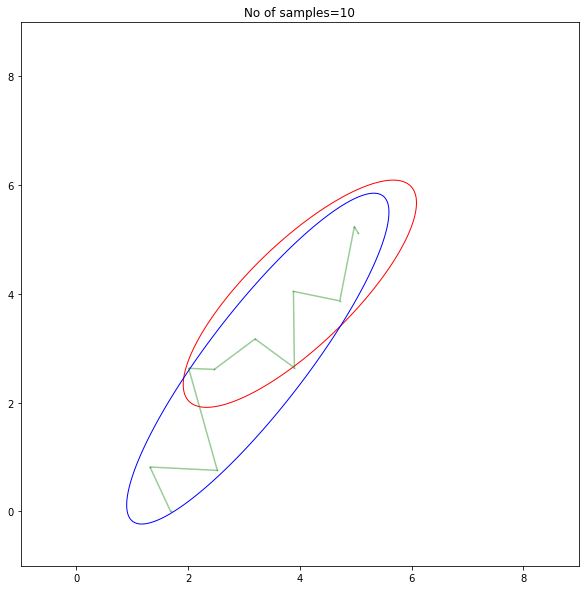

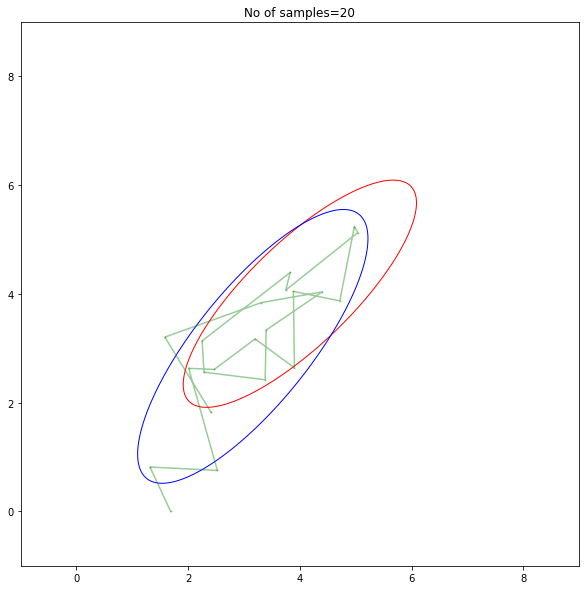

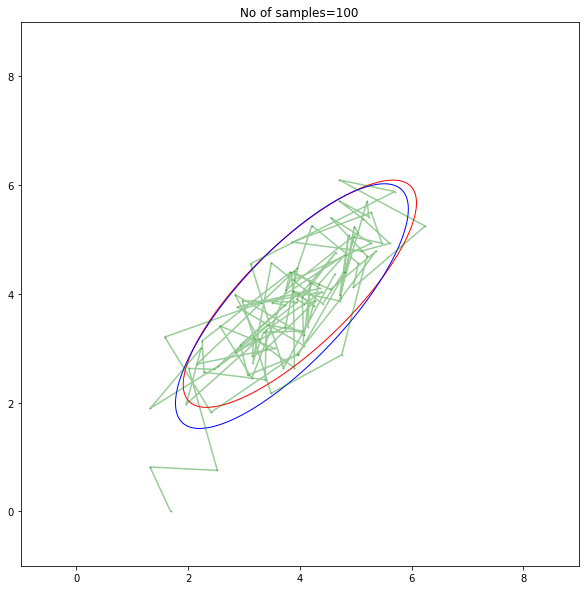

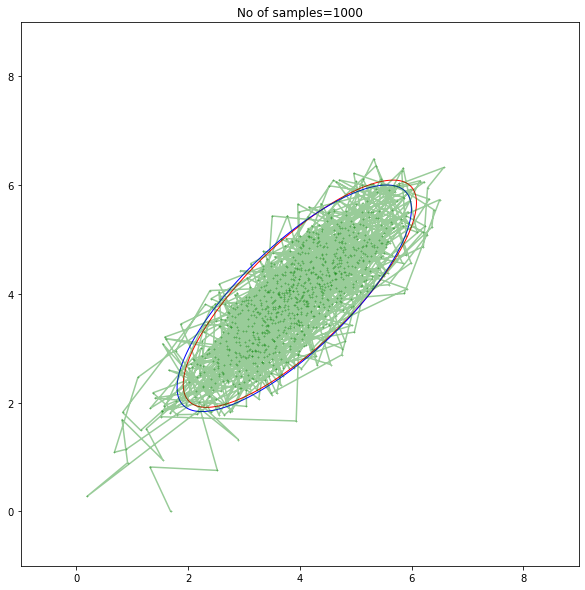

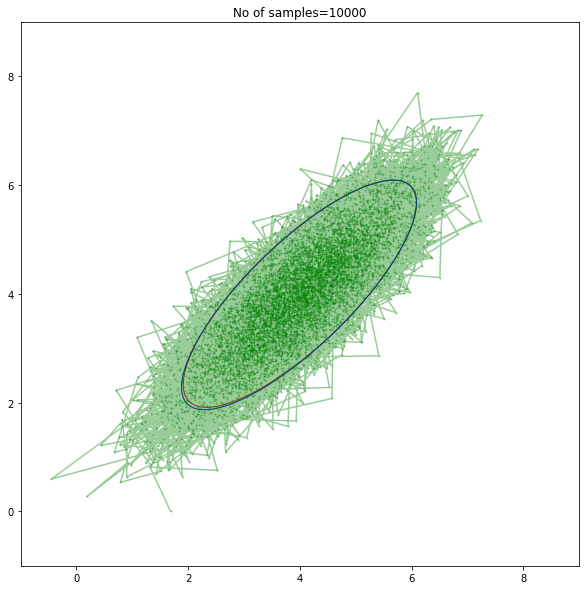

In [4]:
n_plot=[10,20,100,1000]
x1=[]
x2=[]

x2_cond=0
x2.append(x2_cond)
N=10000
for i in range(N):
    x1_cond=0.8*x2_cond+0.8+np.sqrt(1-0.8**2)*np.random.normal(0,1,1)
    x1.append(x1_cond)
    
    x2_cond=0.8*x1_cond+0.8+np.sqrt(1-0.8**2)*np.random.normal(0,1,1)
    
    if i in n_plot:
      plot(x1,x2,i) 
    if i<N-1:
        x2.append(x2_cond)
plot(x1,x2,N)      


# **Sampling using Metropolis Hastings algorithm**

In [5]:
def plot2(samples,n):
  samples_ = np.array(samples)
  sample_mean = findMean(samples_)
  sample_cov = findCov(samples_, sample_mean)   
  plt.figure(figsize=(10,10))            
  plt.contour(x, y, multivariate_normal.pdf(pos, [4, 4], [[1, 0.8],[0.8, 1]]), levels=[0.03], colors="red", linewidths=1)
  plt.contour(x, y, q(pos, sample_mean, sample_cov), levels=[0.03], colors="blue", linewidths=1)
  plt.plot(samples_[:,0],samples_[:,1],color='g', alpha=0.4, marker="+",markersize=2)
  plt.title("No of samples="+str(n))


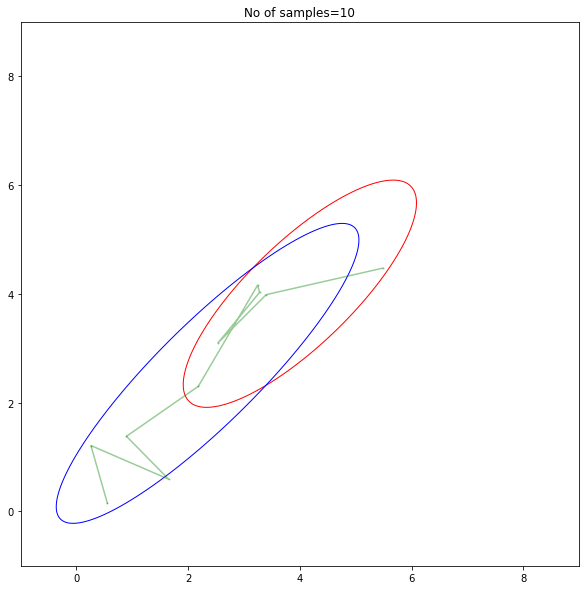

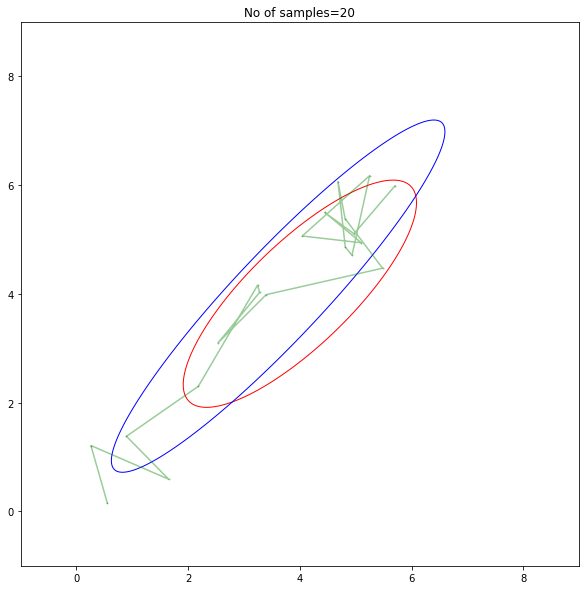

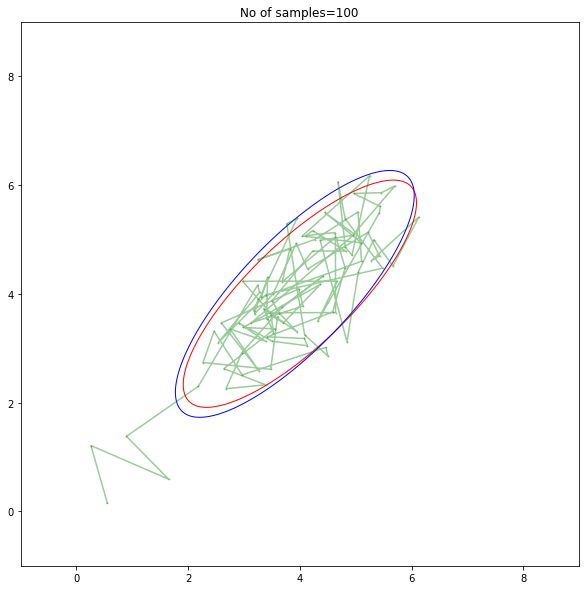

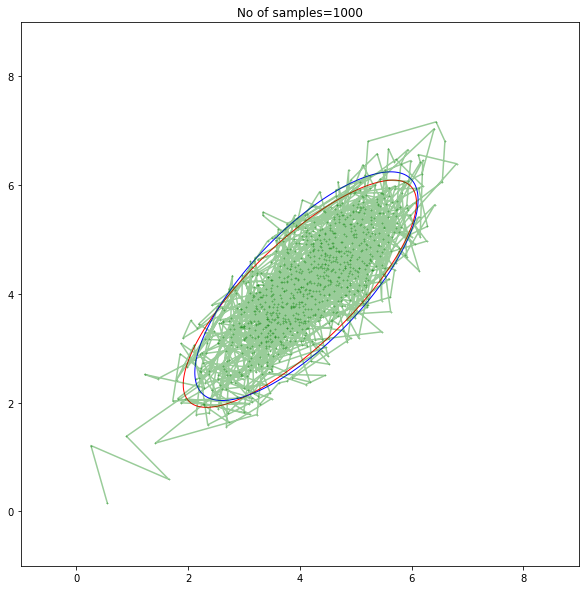

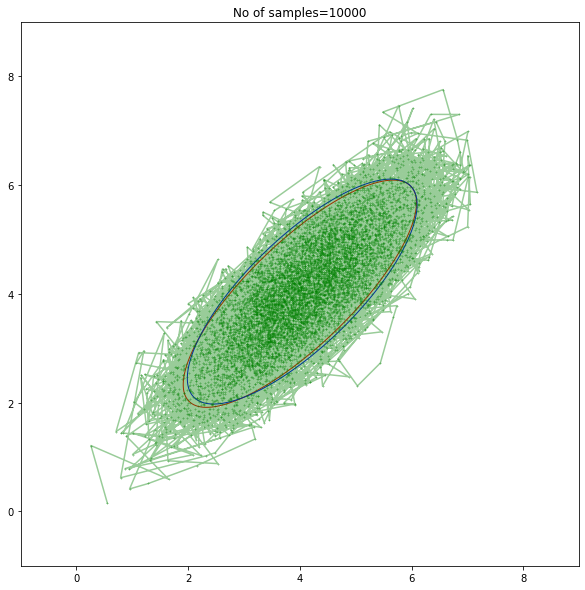

In [6]:
var=1
cov = var*np.eye(2)
samples= list()
count = 0
n_samples = 0
z_l=[0,0]
while n_samples <= 10000:
    count += 1
    z = np.random.multivariate_normal(z_l, cov)
    u = np.random.uniform()
    A = (multivariate_normal.pdf(z, [4, 4], [[1, 0.8],[0.8, 1]])*q(z_l, z, var))/(multivariate_normal.pdf(z_l, [4, 4], [[1, 0.8],[0.8, 1]])*q(z, z_l, var))
    A = min(1, A)
    if u < A:
        samples.append(z)
        n_samples += 1
        z_l = z
        if n_samples in [10,20,100,1000,10000]:
          plot2(samples,n_samples)
            


In [7]:
print("Acceptance rate = ",n_samples/count)

Acceptance rate =  0.39844621513944223
